# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

![](images/crisp.png)  


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

**Business ojectives** : The primary objective for used car dealership is to sell more cars, grow customer base and beat the competition in a business of selling used cars in their geographical region.

**Business success criterion** :


1.   Increase the customer churn
2.   Increase the used car business revenue by 25% YoY
3.   Become the #1 used car seller in the region

**Assess sitautaion** :



1.   Determine what customer values in a used car
2.   Understanding customer's spending to buy a used car

**Data mining and analyis goals** :



1.   To understand vaious categorical infomration that controls the used
car prices like:


*   Car's technical specifications
*   Geographical and demographics
*   Brand etc


2.  Come up with a data model to predict car price













### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

**Data understandig** :

1.   Accessing data file and loading in Pandas dataframe
2.   Examine, understand and describe the acquired data
3.   Identify mising data and irelevant data
4.   Verify data quality if it can help with business objectives




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder, StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import make_column_transformer, make_column_selector
!pip install category_encoders
from category_encoders import JamesSteinEncoder
from sklearn.inspection import permutation_importance

from sklearn import set_config
#setting this will display the pipelines
set_config(display="diagram")

warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
vehicles_df = pd.read_csv('data/vehicles.csv')
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [ ]:
# Converting categories to their native data types
vehicles_df = vehicles_df.convert_dtypes()
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            426880 non-null  Int64 
 1   region        426880 non-null  string
 2   price         426880 non-null  Int64 
 3   year          425675 non-null  Int64 
 4   manufacturer  409234 non-null  string
 5   model         421603 non-null  string
 6   condition     252776 non-null  string
 7   cylinders     249202 non-null  string
 8   fuel          423867 non-null  string
 9   odometer      422480 non-null  Int64 
 10  title_status  418638 non-null  string
 11  transmission  424324 non-null  string
 12  VIN           265838 non-null  string
 13  drive         296313 non-null  string
 14  size          120519 non-null  string
 15  type          334022 non-null  string
 16  paint_color   296677 non-null  string
 17  state         426880 non-null  string
dtypes: Int64(4), string(14)


In [ ]:
# Get to know the data
vehicles_df.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
304173,7303099100,lawton,19990,2019,kia,niro s touring wagon 4d,good,<NA>,hybrid,30590,clean,other,KNDCC3LC2K5233394,fwd,<NA>,wagon,white,ok
178771,7313548314,maine,2350,2010,ford,transit connect xlt,fair,4 cylinders,gas,200000,clean,automatic,<NA>,fwd,mid-size,van,red,me
166595,7311819582,"kansas city, MO",9598,2011,cadillac,dts,<NA>,<NA>,gas,100726,clean,automatic,1G6KH5E66BU119746,fwd,<NA>,<NA>,<NA>,ks
184263,7311327848,eastern shore,33990,2012,mercedes-benz,e-class e 63 amg,good,8 cylinders,gas,88107,clean,automatic,WDDHF7EB7CA570344,rwd,<NA>,sedan,white,md
211512,7316105134,duluth / superior,2000,1998,ram,1500,fair,8 cylinders,gas,189000,clean,automatic,<NA>,4wd,<NA>,truck,red,mn


In [ ]:
#find percentage of missing data in each column
vehicles_df.isna().mean()*100

,0
id,0.000000
region,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470
fuel,0.705819
odometer,1.030735


In [ ]:
#print unique value for each columns of vechicle of type strings
for col in vehicles_df.select_dtypes('string').columns:
  print(f'{col}: {vehicles_df[col].unique()}')

region: <StringArray>
[              'prescott',           'fayetteville',           'florida keys',
 'worcester / central MA',             'greensboro',          'hudson valley',
        'medford-ashland',                   'erie',                'el paso',
             'bellingham',
 ...
             'eau claire',              'green bay',             'janesville',
         'kenosha-racine',                'madison',              'milwaukee',
            'northern WI',              'sheboygan',                 'wausau',
                'wyoming']
Length: 404, dtype: string
manufacturer: <StringArray>
[             <NA>,             'gmc',       'chevrolet',          'toyota',
            'ford',            'jeep',          'nissan',             'ram',
           'mazda',        'cadillac',           'honda',           'dodge',
           'lexus',          'jaguar',           'buick',        'chrysler',
           'volvo',            'audi',        'infiniti',         'lincoln',
     

In [ ]:
# Find number of duplicate samples
dup = vehicles_df.duplicated().sum()
print(f'Number of duplicate samples: {dup}')

Number of duplicate samples: 0


**Data understanding report** :



1.   Size of acquired data = 426880 samples
2.   Data has total 18 categorical columns
3.   No duplicate samples

Most missing data are :

| Category | Missing  percentage|
|---|---|
| Size of vehicle | 71.7% |
| Cylinders | 41.6% |
|Condition | 40.7%|
| Drive | 30.5% |
|paint color | 30.5% |
| VIN | 37.7%|
| Type | 21.7% |


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

### This section lists the data preprocessing



1.   Create a new data frame consists of cleaned and preprocessed data
2.   99.8 % of the samples having vechicle price < 100000 . Drop vehciles with prices > 1000000. these are price outliers
3.   Vehicles older than 100 years having high prices. Could be vintage vehicles.
4.   Vehicle price state and region wise is like white noise can be dropped
5.   id, VIN shoudl not influence the price, so shoudl be dropped
6.   Drop samples with odometer NA
7.   Drop the samples with year info as NA. Could not determine the age
8.   New feature 'age' is engineered from 'year' and dropped the year column
9.   More then 99% of the data has odometer reading < 300000. drop rest of the outliers



In [ ]:
# find percentage of vehicle price < 100000
print(vehicles_df[vehicles_df['price'] < 100000].shape[0]/vehicles_df.shape[0]*100)

99.83672226386805


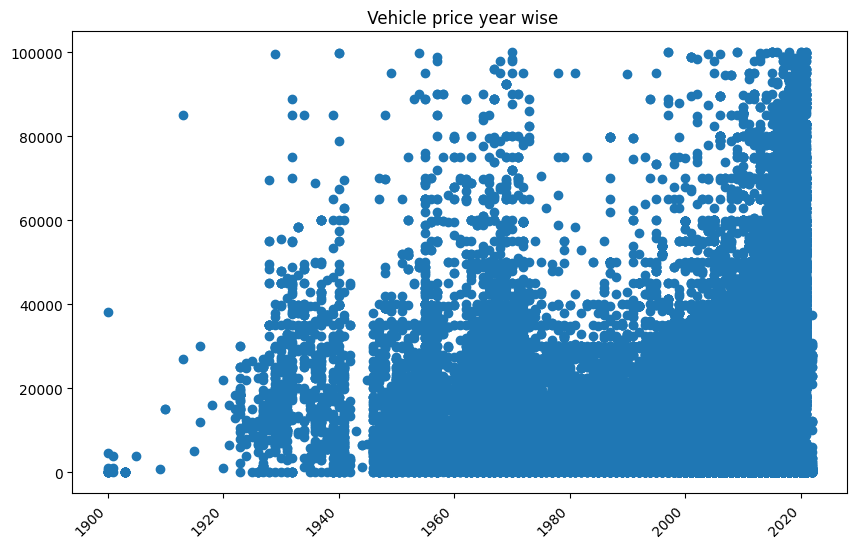

In [ ]:
#remove the samples having price outlier
vehicles = vehicles_df[(vehicles_df['price'] < 100000) ]
# scatter plot year vs price
plt.figure(figsize=(10, 6))
plt.scatter(vehicles['year'],vehicles['price'])
plt.title(" Vehicle price year wise")
plt.xticks(rotation=45, ha='right')
plt.show()

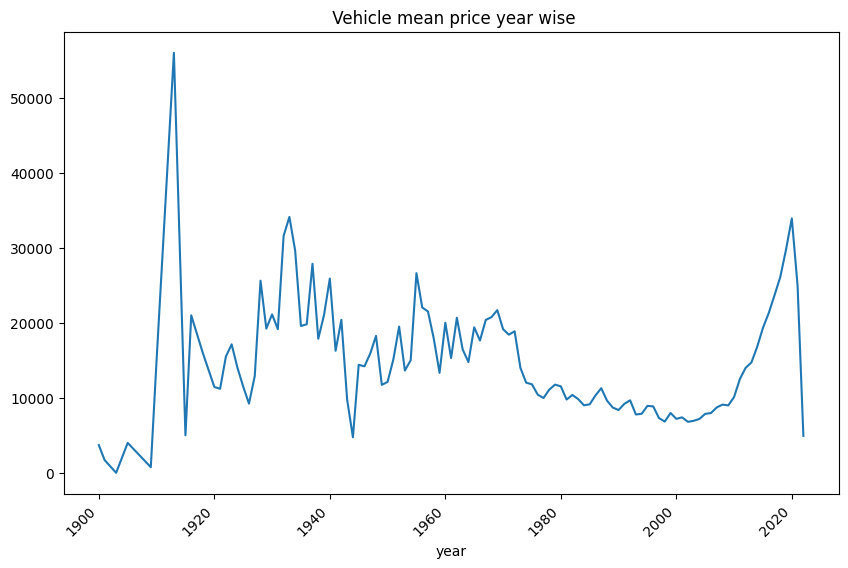

In [ ]:
# plot year wise mean price of vehicle
plt.figure(figsize=(10, 6))
vehicles.groupby('year')['price'].mean().plot(kind='line')
plt.title(" Vehicle mean price year wise")
plt.xticks(rotation=45, ha='right')
plt.show()



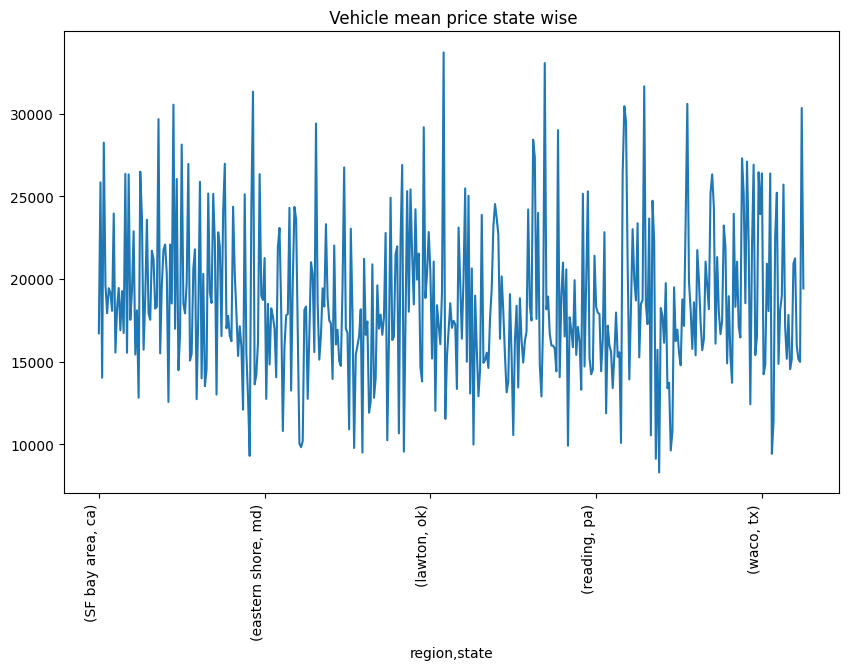

In [ ]:
# Aggregate plot state  and region wise vehcile price
plt.figure(figsize=(10, 6))
vehicles.groupby(['region', 'state'])['price'].mean().plot(kind='line')
plt.title(" Vehicle mean price state wise")
plt.xticks(rotation=90, ha='right')
plt.show()

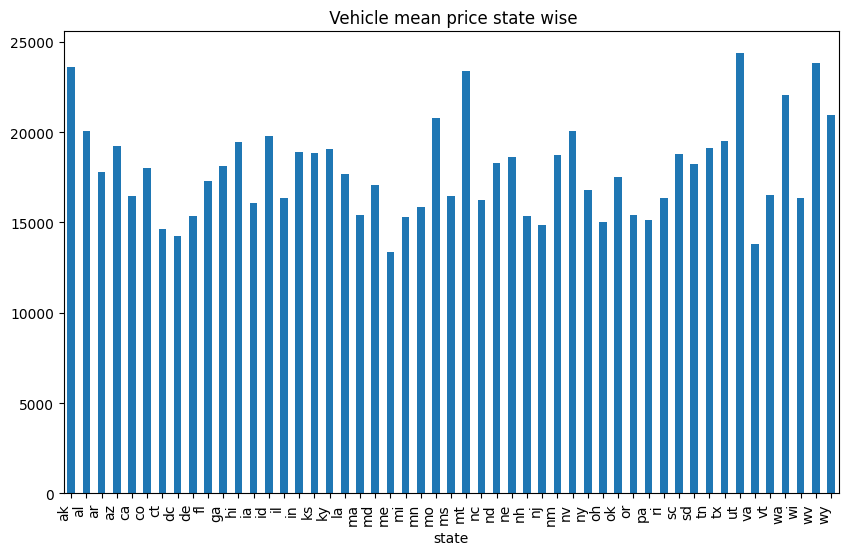

In [ ]:
# plot state wise price histogram
plt.figure(figsize=(10, 6))
vehicles.groupby('state')['price'].mean().plot(kind='bar')
plt.title(" Vehicle mean price state wise")
plt.xticks(rotation=90, ha='right')
plt.show()

In [ ]:
# drop id, VIN and cylinders
vehicles.drop(columns=['id', 'VIN', 'cylinders', 'region', 'state'], inplace=True)
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426183 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         426183 non-null  Int64 
 1   year          424980 non-null  Int64 
 2   manufacturer  408734 non-null  string
 3   model         421007 non-null  string
 4   condition     252478 non-null  string
 5   fuel          423174 non-null  string
 6   odometer      421790 non-null  Int64 
 7   title_status  417942 non-null  string
 8   transmission  423634 non-null  string
 9   drive         295901 non-null  string
 10  size          120307 non-null  string
 11  type          333520 non-null  string
 12  paint_color   296297 non-null  string
dtypes: Int64(3), string(10)
memory usage: 46.7 MB


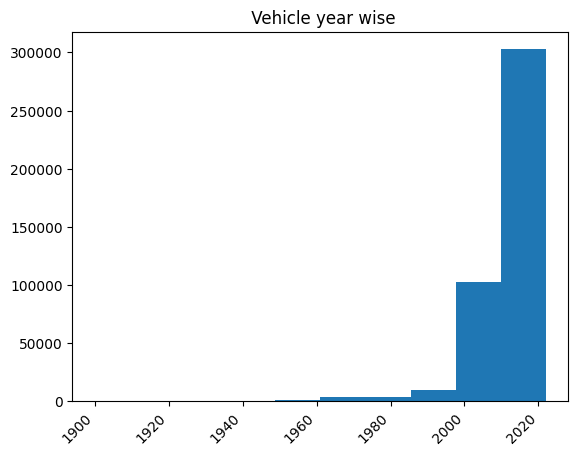

In [ ]:
plt.hist(vehicles['year'])
plt.title(" Vehicle year wise")
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# drop samples with odometer na
vehicles.dropna(subset=['odometer'], inplace=True)
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421790 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         421790 non-null  Int64 
 1   year          420656 non-null  Int64 
 2   manufacturer  404590 non-null  string
 3   model         416696 non-null  string
 4   condition     250570 non-null  string
 5   fuel          419422 non-null  string
 6   odometer      421790 non-null  Int64 
 7   title_status  414189 non-null  string
 8   transmission  420102 non-null  string
 9   drive         292995 non-null  string
 10  size          119520 non-null  string
 11  type          330081 non-null  string
 12  paint_color   293923 non-null  string
dtypes: Int64(3), string(10)
memory usage: 46.3 MB


In [ ]:
# percentage of sample with price 0
print(vehicles[vehicles['price'] == 0].shape[0]/vehicles.shape[0]*100)
# percentage of vehicle with year na
print(vehicles[vehicles['year'].isna()].shape[0]/vehicles.shape[0]*100)

7.298655729154318
0.26885416913630006


In [ ]:
# drop vechile with year na
vehicles.dropna(subset=['year'], inplace=True)
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420656 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         420656 non-null  Int64 
 1   year          420656 non-null  Int64 
 2   manufacturer  404584 non-null  string
 3   model         415562 non-null  string
 4   condition     250560 non-null  string
 5   fuel          418487 non-null  string
 6   odometer      420656 non-null  Int64 
 7   title_status  413299 non-null  string
 8   transmission  418968 non-null  string
 9   drive         292092 non-null  string
 10  size          119520 non-null  string
 11  type          329069 non-null  string
 12  paint_color   292875 non-null  string
dtypes: Int64(3), string(10)
memory usage: 46.1 MB


In [ ]:
# add a column with max of year subtracted by year
print(vehicles['year'].max())
vehicles['age'] = 2025 - vehicles['year']
print(vehicles['age'].max())
print(vehicles['age'].min())
# drop year column
vehicles.drop(columns=['year'], inplace=True)
vehicles.info()

2022
125
3
<class 'pandas.core.frame.DataFrame'>
Index: 420656 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         420656 non-null  Int64 
 1   manufacturer  404584 non-null  string
 2   model         415562 non-null  string
 3   condition     250560 non-null  string
 4   fuel          418487 non-null  string
 5   odometer      420656 non-null  Int64 
 6   title_status  413299 non-null  string
 7   transmission  418968 non-null  string
 8   drive         292092 non-null  string
 9   size          119520 non-null  string
 10  type          329069 non-null  string
 11  paint_color   292875 non-null  string
 12  age           420656 non-null  Int64 
dtypes: Int64(3), string(10)
memory usage: 46.1 MB


<Figure size 1000x600 with 0 Axes>

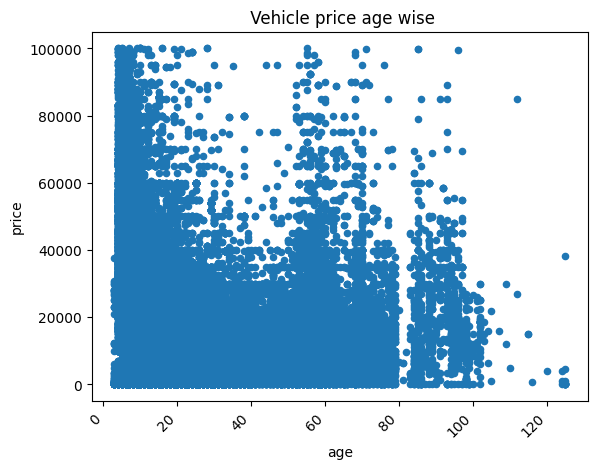

In [ ]:
# plot age vs price
plt.figure(figsize=(10, 6))
vehicles.plot(kind='scatter', x='age', y='price')
plt.title(" Vehicle price age wise")
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1000x600 with 0 Axes>

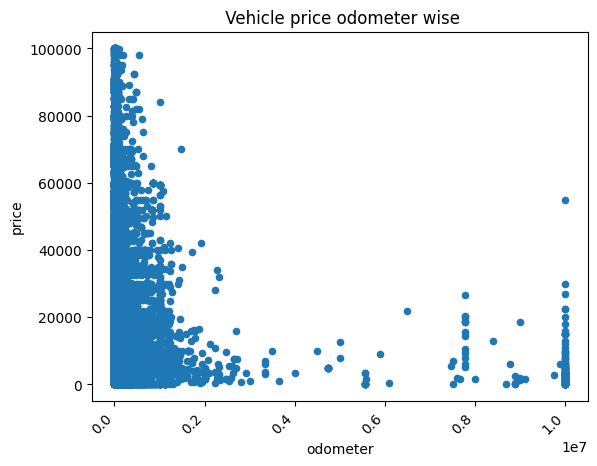

In [ ]:
# plot odometer vs price
plt.figure(figsize=(10, 6))
vehicles.plot(kind='scatter', x='odometer', y='price')
plt.title(" Vehicle price odometer wise")
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# percentage of vehicle with odometer 200000
print(vehicles[vehicles['odometer'] < 300000].shape[0]/vehicles.shape[0]*100)

99.23286485869689


In [ ]:
# drop sample with odometer > 300000
vehicles = vehicles[vehicles['odometer'] < 300000]
vehicles.info()


<class 'pandas.core.frame.DataFrame'>
Index: 417429 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         417429 non-null  Int64 
 1   manufacturer  402253 non-null  string
 2   model         412481 non-null  string
 3   condition     248556 non-null  string
 4   fuel          415266 non-null  string
 5   odometer      417429 non-null  Int64 
 6   title_status  410078 non-null  string
 7   transmission  415764 non-null  string
 8   drive         290384 non-null  string
 9   size          118379 non-null  string
 10  type          327356 non-null  string
 11  paint_color   290987 non-null  string
 12  age           417429 non-null  Int64 
dtypes: Int64(3), string(10)
memory usage: 45.8 MB


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.



1.   Split the data in training and test set in 7:3
2.   Encode all categorical 'string' data types into numerical using JamesSteinEncoder()
3.   Encode 'condition' column using OrdinalEncoder
4.   Fill NA by 'missing' before encoding
5.   Create a pipeline for

     * Column transformer
     * StandardScalar
     * Ridge model

6. Use GridSearchCV with CV = 5 to tune the hyperparameters
7. Use alpha for Ridge regression [0.001, 1, 10, 100, 1000]
8. Use polynomial feature of degree 3




In [ ]:
#generate train/test data for auto
vehicles_X = vehicles.drop(['price'], axis = 1)
vehicles_y = vehicles['price']
X_train, X_test, y_train, y_test = train_test_split(vehicles_X, vehicles_y, test_size=0.3, random_state=42)

In [ ]:
# create a list of categorical column
categorical_cols = ['manufacturer', 'model', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']
ordinal_cols = ['condition']
numerical_cols = ['age','odometer']

# Impute missing values in categorical columns with 'missing'
for col in categorical_cols + ordinal_cols:
    X_train[col] = X_train[col].fillna('missing')
    X_test[col] = X_test[col].fillna('missing')

# make coloumn transformer with ordinal, polynomial and james stein encoder
poly_ordinal_transformer = make_column_transformer((OrdinalEncoder(),ordinal_cols),(JamesSteinEncoder(), categorical_cols),
                                                    (PolynomialFeatures(include_bias = False, degree = 3), numerical_cols))

ridge_pipe = Pipeline([('transformer',poly_ordinal_transformer),
                      ('scaler', StandardScaler()),
                      ('ridge', Ridge())])

# show the diagram of pipeline
ridge_pipe


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['condition']),
                                                 ('jamessteinencoder',
                                                  JamesSteinEncoder(),
                                                  ['manufacturer', 'model',
                                                   'fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color']),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False),
                                                  ['age', 'odometer'])])),
                ('scaler', StandardScaler()), ('ridge', Ridge())])

In [ ]:
alpha = {'ridge__alpha': [0.001, 1, 10, 100, 1000]}

model_finder = GridSearchCV(estimator = ridge_pipe,
                               param_grid = alpha,
                               scoring = "neg_mean_squared_error")

In [ ]:
model_finder.fit(X_train, y_train)
model_finder.cv_results_

{'mean_fit_time': array([3.32569842, 3.50890017, 3.25238638, 3.2430881 , 3.5577889 ]),
 'std_fit_time': array([0.52344069, 0.50235545, 0.4785058 , 0.30743654, 0.72642413]),
 'mean_score_time': array([0.29908404, 0.33091159, 0.3248322 , 0.32847109, 0.30591431]),
 'std_score_time': array([0.00461778, 0.07479097, 0.05856018, 0.07376093, 0.03842328]),
 'param_ridge__alpha': masked_array(data=[0.001, 1.0, 10.0, 100.0, 1000.0],
              mask=[False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'ridge__alpha': 0.001},
  {'ridge__alpha': 1},
  {'ridge__alpha': 10},
  {'ridge__alpha': 100},
  {'ridge__alpha': 1000}],
 'split0_test_score': array([-94757948.38864784, -94758829.67256768, -94766896.57720624,
        -94855477.31635351, -95558134.64963092]),
 'split1_test_score': array([-95536895.9143054 , -95537395.80577143, -95542304.99657045,
        -95619060.55176423, -96463445.34914578]),
 'split2_test_score': array([-96728411.49275948, -96729030.62300509, -9673485

In [ ]:
best_model = model_finder.best_estimator_
best_model

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['condition']),
                                                 ('jamessteinencoder',
                                                  JamesSteinEncoder(),
                                                  ['manufacturer', 'model',
                                                   'fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color']),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False),
                                                  ['age', 'odometer'])])),
                ('scaler', StandardScaler()), ('ridge', Ridge(alpha=0.001))])

In [ ]:
print(f" MSE for our best Ridge Regression model: {-model_finder.best_score_}")
best_model.fit(X_train, y_train)
r_p1 = best_model.predict(X_train)
r_p2 = best_model.predict(X_test)
r_train_mses = mean_squared_error(y_train, r_p1)
r_test_mses = mean_squared_error(y_test, r_p2)
print(f'r_train_mses: {r_train_mses}')
print(f'r_test_mses: {r_test_mses}')

 MSE for our best Ridge Regression model: 95333778.48305011
r_train_mses: 83983282.49997602
r_test_mses: 94578677.09032884


In [ ]:
ridge_coefs = best_model.named_steps['ridge'].coef_

feature_names = best_model[:-1].get_feature_names_out()
ridge_df = pd.DataFrame({'feature': feature_names, 'coef': ridge_coefs})
print(ridge_coefs)
# print ridge_df coef in descending order
ridge_df = ridge_df.sort_values(by='coef', ascending=False)
ridge_df.loc[ridge_df['coef'] != 0]

[   -42.75354       375.72356502   8081.04706235   1252.06544586
    433.223791    -1586.4086001     794.26249403    200.63473873
    839.36618658    261.92504875 -13128.69459509  -2534.58759861
  18977.28723256   3118.56990857  -1874.04039494  -8480.72145304
  -1073.22585453  -1220.66130698   1770.13581521]


,feature,coef
12,polynomialfeatures__age^2,18977.287233
2,jamessteinencoder__model,8081.047062
13,polynomialfeatures__age odometer,3118.569909
18,polynomialfeatures__odometer^3,1770.135815
3,jamessteinencoder__fuel,1252.065446
8,jamessteinencoder__type,839.366187
6,jamessteinencoder__drive,794.262494
4,jamessteinencoder__title_status,433.223791
1,jamessteinencoder__manufacturer,375.723565
9,jamessteinencoder__paint_color,261.925049


In [ ]:
# Calculate the permutation importance
results = permutation_importance(best_model, X_test, y_test)
importances = pd.DataFrame(data=results.importances_mean, index=vehicles_X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(importances)

              Importance
model           0.524750
age             0.105356
odometer        0.046878
transmission    0.022941
fuel            0.016195
type            0.007739
drive           0.007094
title_status    0.001929
manufacturer    0.001692
paint_color     0.000744
size            0.000541
condition      -0.000012


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Findings from the model evaluation

* GridSearchCV with CV = 5 avoided overfitting and underfitting
* StandardScalar helped to remove biase by normalizing the values
* Polynomial feature with degree =3 reduced complexity with optimized mean squared error
* Ridge regression with alpha 0.001 found by GridSearchCV provded reduced model complexity  

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

## **Recommendations to used car delears**

### Based on data modelling and analysis, the top 3 parametes that drives teh price of car are



1.   Car model
2.   Age of car - Older the car lesser the price
3.   Odometer - lesser the mileage , higher the price


Following are the parameters that customers values most :

 |Parameters | Importance|
 |--|--|
|model |          0.524750|
|age     |        0.105356|
|odometer  |      0.046878|
|transmission  |  0.022941|
|fuel    |        0.016195|
|type    |        0.007739|
|drive   |        0.007094|
|title_status |   0.001929|
|manufacturer |   0.001692|
|paint_color  |   0.000744|
|size        |    0.000541|
|condition    |  -0.000012|


